<a href="https://colab.research.google.com/github/jiwonny29/Becoming_RENTABLE/blob/main/Data_visulization_Seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-trained Model with 6 keywords

In [3]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk import sent_tokenize

# Download required NLTK resources
nltk.download('punkt')

# Load the CSV file
df = pd.read_csv('/content/reviews_Seattle.csv', encoding='utf-8')


# Keywords to search for in the sentences
keywords = ["wheelchair", "disability", "handicap", "disabled", "elderly", "elevator"]

# Function to extract sentences containing specific keywords and analyze sentiment using TextBlob
def analyze_sentiment_in_review(review):
    # Check if the review is a string, if not return None
    if not isinstance(review, str):
        return None

    # Tokenize the review into sentences
    sentences = sent_tokenize(review)

    # Filter sentences containing any of the target keywords
    relevant_sentences = [sent for sent in sentences if any(keyword in sent.lower() for keyword in keywords)]

    # If no relevant sentences are found, return None (null)
    if len(relevant_sentences) == 0:
        return None

    # Analyze sentiment of each relevant sentence using TextBlob
    sentiment_scores = []
    for sent in relevant_sentences:
        blob = TextBlob(sent)
        sentiment_scores.append(blob.sentiment.polarity)  # Polarity score ranges from -1 (negative) to 1 (positive)

    # Calculate the average sentiment score for the review (if there are multiple relevant sentences)
    avg_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)

    # Classify the overall sentiment as positive, negative, or neutral based on the average score
    if avg_sentiment_score > 0.05:
        return 'positive'
    elif avg_sentiment_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each review in the 'comments' column, ensuring only valid strings are processed
df['sentiment'] = df['comments'].apply(analyze_sentiment_in_review)

# Save the results to a new CSV file
df.to_csv('/content/reviews_with_sentiment.csv', index=False)

print("Sentiment analysis completed and saved to 'reviews_with_sentiment.csv'.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


        listing_id         id  \
0             6606       5664   
1             6606     338761   
2             6606     467904   
3             6606     480017   
4             6606     487278   
...            ...        ...   
235498    24698751  289631782   
235499    24698751  290588762   
235500    24698751  293653091   
235501    24698751  304537923   
235502    24698751   46308015   

                                                 comments sentiment  
0       The Urban Cottage is comfortable, beautiful, f...      None  
1       Joyce was a wonderful host and the urban cotta...      None  
2       Beautiful cottage and warm hospitality from Jo...      None  
3       Joyce is a wonderful host! She is warm, helpfu...      None  
4       Joyce's cottage is the perfect Seattle locatio...      None  
...                                                   ...       ...  
235498  House was amazing, very nice view and a clean ...      None  
235499  This property saved us after our ex

<ipython-input-4-49c289b6159f>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-4-49c289b6159f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


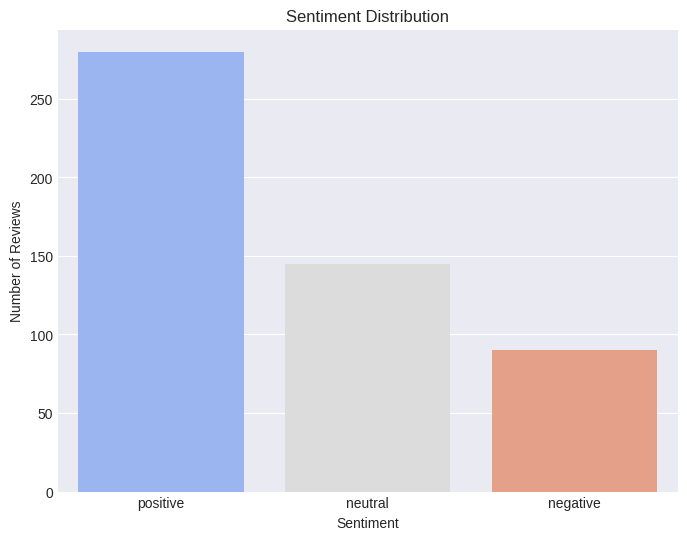

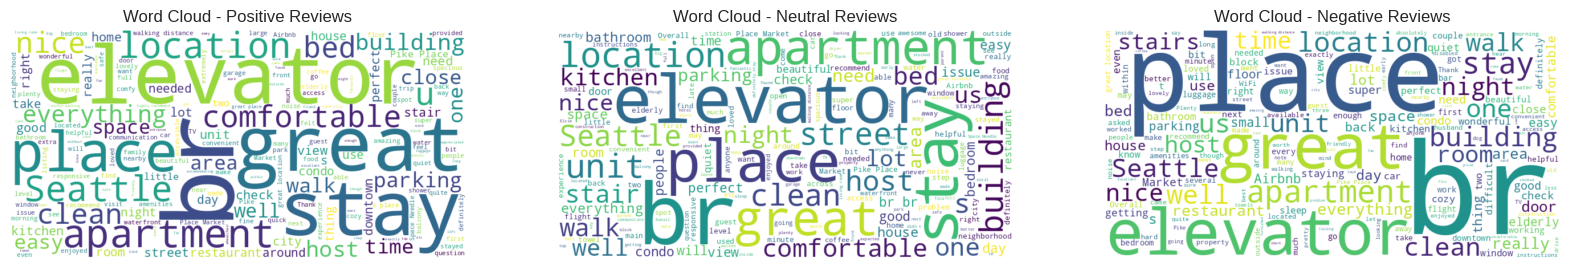

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the data (ensure the path is correct if you already saved the file)
df = pd.read_csv('/content/reviews_with_sentiment.csv')

# Basic settings for the visualizations
plt.style.use('seaborn-darkgrid')

# 1. Visualize Sentiment Distribution
def plot_sentiment_distribution(df):
    sentiment_counts = df['sentiment'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.show()

# 2. Visualize Sentiment by Listing (Top 10 Listings by Review Count)
def plot_sentiment_by_listing(df):
    top_10_listings = df['listing_id'].value_counts().nlargest(10).index
    filtered_df = df[df['listing_id'].isin(top_10_listings)]

    plt.figure(figsize=(10, 8))
    sns.countplot(data=filtered_df, x='listing_id', hue='sentiment', palette='coolwarm')
    plt.title('Sentiment by Listing (Top 10 Listings)')
    plt.xlabel('Listing ID')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.show()

# 3. Generate Word Clouds for Positive, Neutral, and Negative Sentiments
def plot_word_clouds(df):
    sentiment_labels = ['positive', 'neutral', 'negative']
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))

    for i, sentiment in enumerate(sentiment_labels):
        text = ' '.join(df[df['sentiment'] == sentiment]['comments'].dropna())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f"Word Cloud - {sentiment.capitalize()} Reviews")
        axes[i].axis('off')

    plt.show()

# Run the visualizations
plot_sentiment_distribution(df)
plot_word_clouds(df)

##Pre-trained Model with 43 keywords

In [5]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk import sent_tokenize
from collections import Counter

# Download required NLTK resources
nltk.download('punkt')

# Load the CSV file
df = pd.read_csv('/content/reviews_Seattle.csv')

# Define expanded list of keywords including mobility and cognitive features
# Exclude ambiguous terms like "accessible" to avoid false positives (e.g., "accessible to airport")
keywords = [
    "wheelchair", "disability", "handicap", "disabled", "elderly", "elevator", "ramp", "grab bars", "lift",
    "lowered mirror", "shower chair", "roll-in shower", "stair lift", "platform lift", "clear path", "hard surface flooring",
    "adjustable bed", "hoyer lift", "exterior door", "interior lever handles", "zero steps", "shower bench", "lift chair",
    "night lights", "dimmer switches", "muted color scheme", "black out curtains", "noise machine", "glider", "bath tub",
    "secondary locks", "fenced yard", "odor free", "wheel under sink", "accessible parking spot", "keyless entry",
    "mobility features", "no steps", "wide doorway", "step-free", "accessible bathroom", "accessible shower", "accessible toilet"
]

# Function to extract sentences containing specific keywords and analyze sentiment using TextBlob
def analyze_sentiment_in_review(review):
    # Check if the review is a string, if not return None
    if not isinstance(review, str):
        return None

    # Tokenize the review into sentences
    sentences = sent_tokenize(review)

    # Filter sentences containing any of the target keywords
    relevant_sentences = [sent for sent in sentences if any(keyword in sent.lower() for keyword in keywords)]

    # If no relevant sentences are found, return None (null)
    if len(relevant_sentences) == 0:
        return None

    # Analyze sentiment of each relevant sentence using TextBlob
    sentiment_scores = []
    for sent in relevant_sentences:
        blob = TextBlob(sent)
        sentiment_scores.append(blob.sentiment.polarity)  # Polarity score ranges from -1 (negative) to 1 (positive)

    # Calculate the average sentiment score for the review (if there are multiple relevant sentences)
    avg_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)

    # Classify the overall sentiment as positive, negative, or neutral based on the average score
    if avg_sentiment_score > 0.05:
        return 'positive'
    elif avg_sentiment_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Function to count occurrences of each keyword in the review
def count_keywords_in_review(review):
    # Check if the review is a string, if not return an empty Counter
    if not isinstance(review, str):
        return Counter()

    # Tokenize the review into sentences
    sentences = sent_tokenize(review)

    # Create a Counter to keep track of keyword occurrences
    keyword_counter = Counter()

    # Count occurrences of each keyword in the sentences
    for sent in sentences:
        for keyword in keywords:
            if keyword in sent.lower():
                keyword_counter[keyword] += 1

    return keyword_counter

# Apply the function to each review in the 'comments' column to analyze sentiment
df['sentiment'] = df['comments'].apply(analyze_sentiment_in_review)

# Apply the function to count keyword occurrences in each review
df['keyword_counts'] = df['comments'].apply(count_keywords_in_review)

# Aggregate keyword counts across all reviews
total_keyword_counts = sum(df['keyword_counts'], Counter())

# Print the DataFrame with the new sentiment and keyword count columns
print(df[['listing_id', 'id', 'comments', 'sentiment', 'keyword_counts']])

# Print the total keyword counts
print("Total keyword counts across all reviews:")
for keyword, count in total_keyword_counts.items():
    print(f"{keyword}: {count}")

# Save the results to a new CSV file
df.to_csv('/content/reviews_with_sentiment_and_keyword_counts.csv', index=False)

print("Sentiment analysis and keyword counting completed and saved to 'reviews_with_sentiment_and_keyword_counts.csv'.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                 listing_id                   id  \
0                      6606                 5664   
1                      6606               338761   
2                      6606               467904   
3                      6606               480017   
4                      6606               487278   
...                     ...                  ...   
481345  1176438433322548146  1178416673225303050   
481346  1176549344264444213  1184250547829771947   
481347  1176828099507994596  1185617815073927842   
481348  1177621993353937803  1185670342504157915   
481349  1178445696184881227  1184978396955907606   

                                                 comments sentiment  \
0       The Urban Cottage is comfortable, beautiful, f...      None   
1       Joyce was a wonderful host and the urban cotta...      None   
2       Beautiful cottage and warm hospitality from Jo...      None   
3       Joyce is a wonderful host! She is warm, helpfu...      None   
4       Joyce's cott

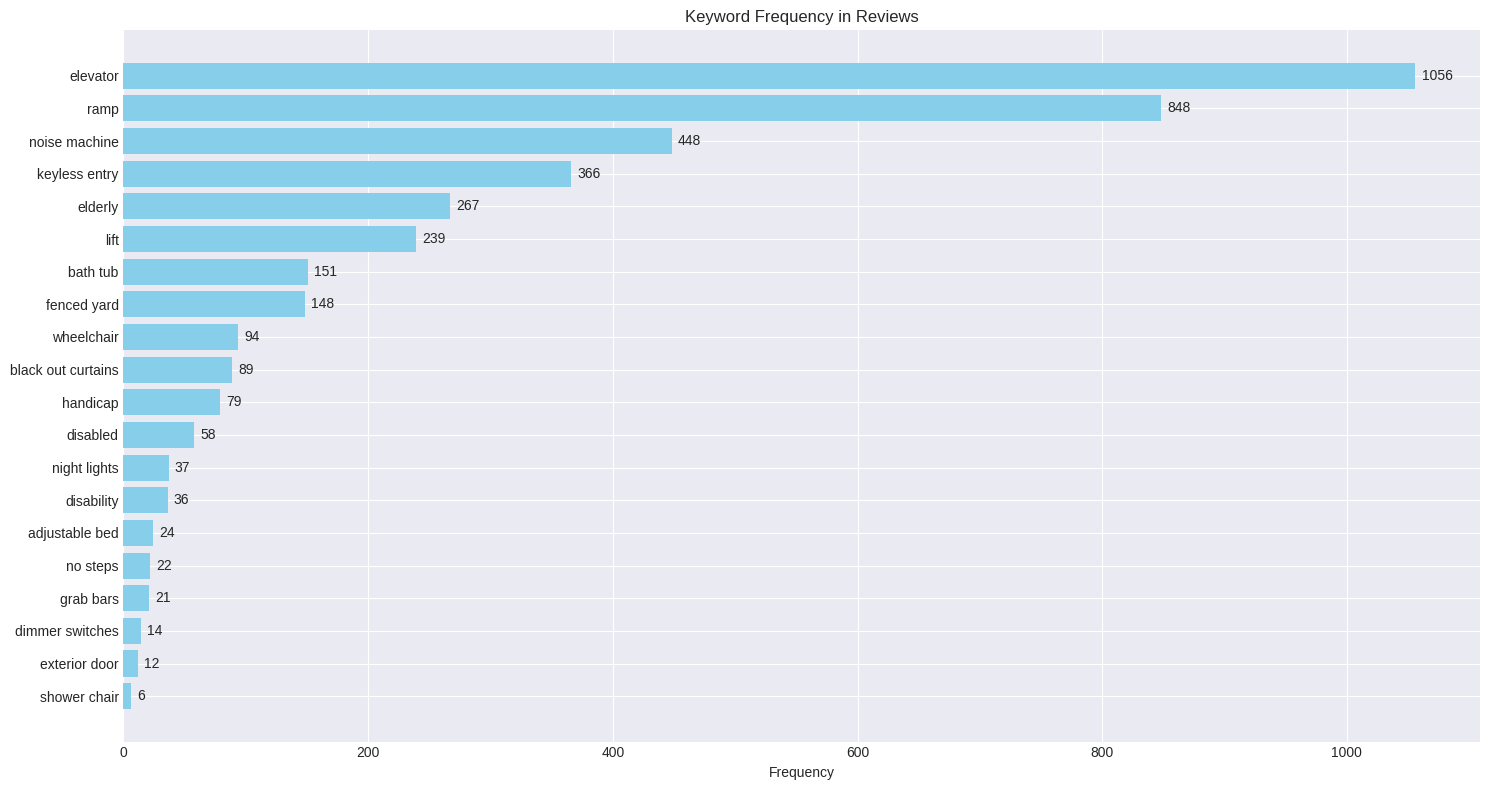

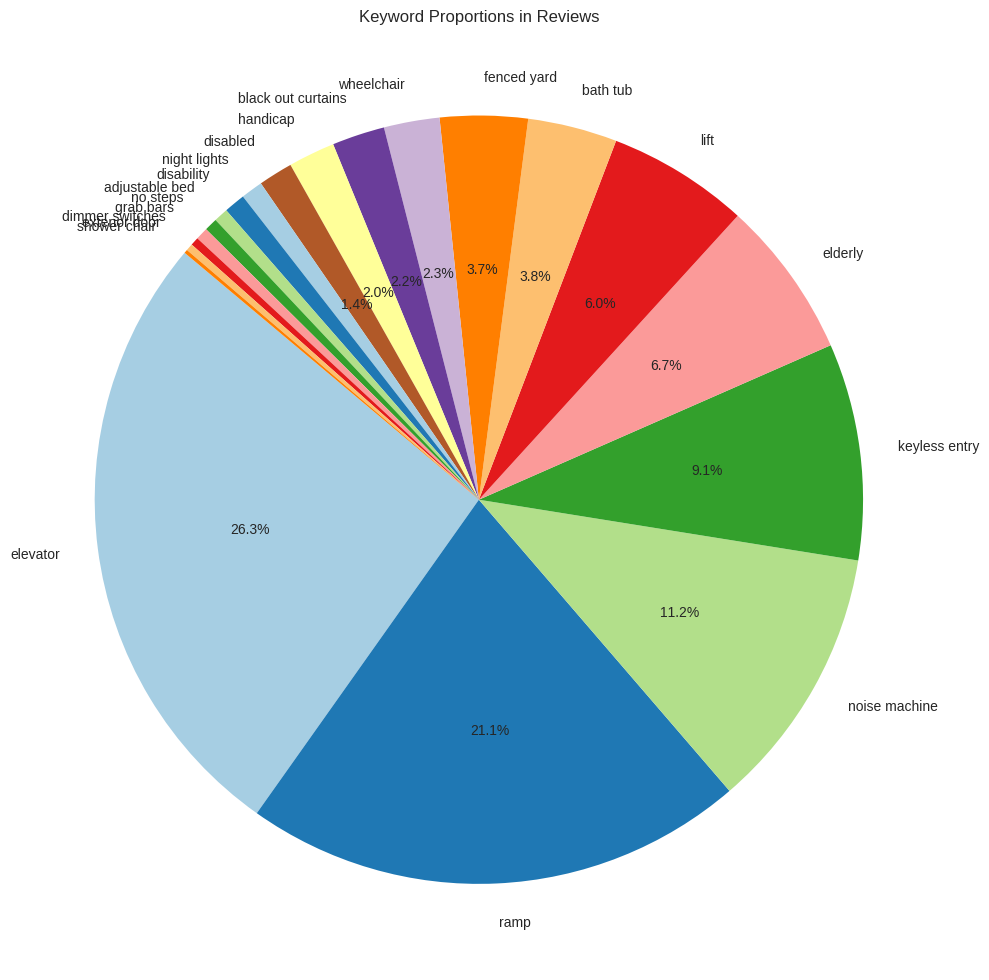

In [6]:
import matplotlib.pyplot as plt

# Visualize the keyword frequency
keywords_list, counts = zip(*[(k, v) for k, v in sorted(total_keyword_counts.items(), key=lambda x: x[1], reverse=True) if v >= 5])  # Filter out keywords with frequency < 5

# Create a bar plot with frequency labels
plt.figure(figsize=(15, 8))
bars = plt.barh(keywords_list, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Keyword Frequency in Reviews')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va='center')

plt.show()

# Create a pie chart to visualize the proportion of each keyword
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=keywords_list, autopct=lambda p: f'{p:.1f}%' if p >= 1 else '', startangle=140, colors=plt.cm.Paired.colors)  # Show only percentages >= 1%
plt.title('Keyword Proportions in Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

<ipython-input-7-224fba76984e>:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sentiment = pd.read_csv('/content/reviews_with_sentiment_and_keyword_counts.csv')


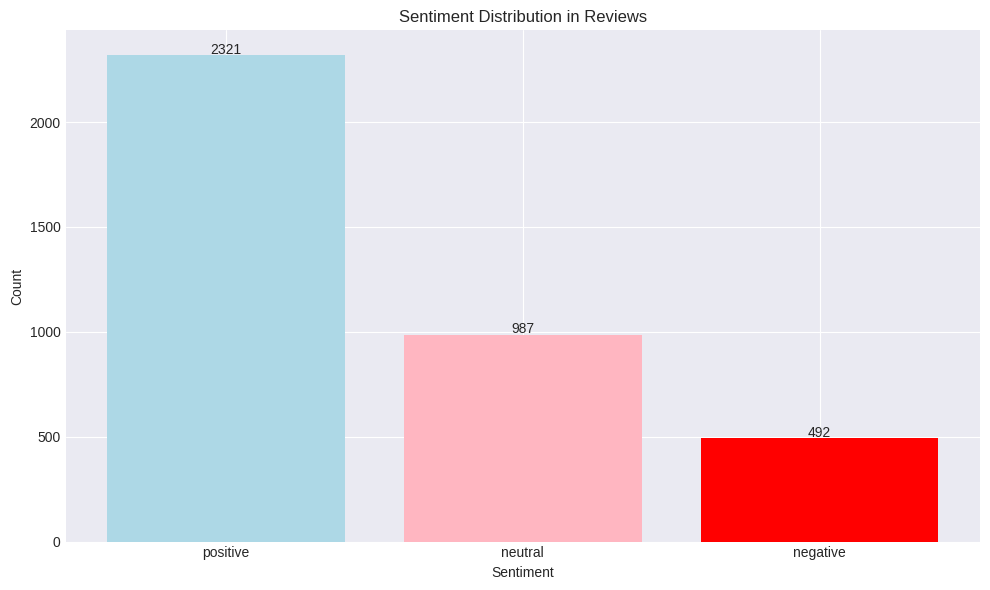

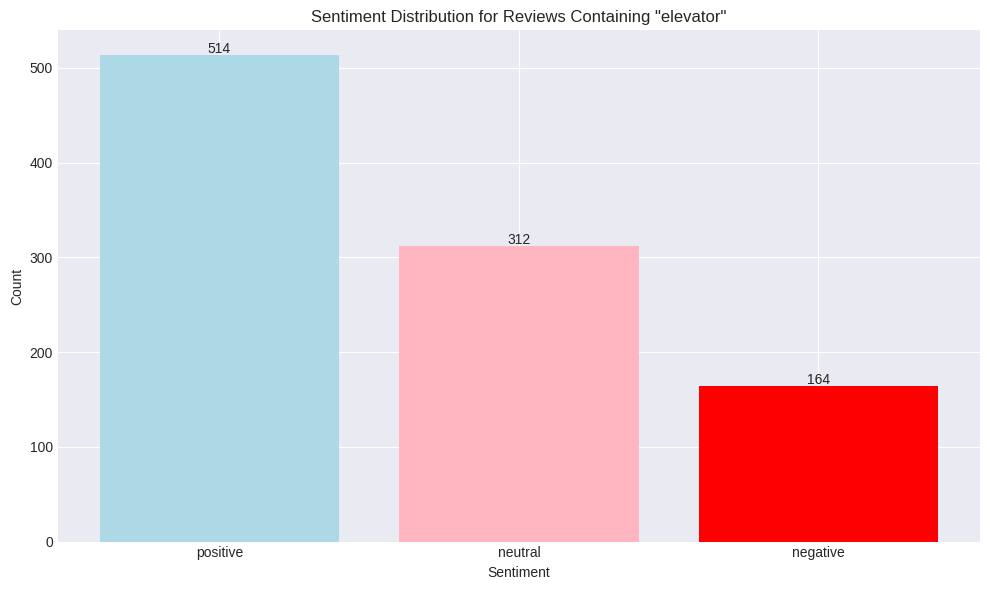

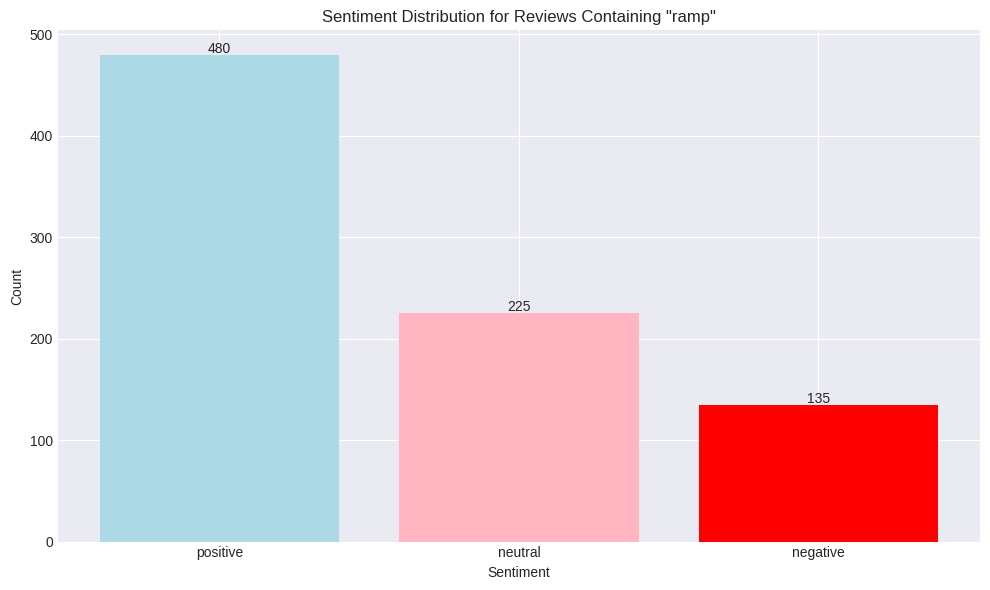

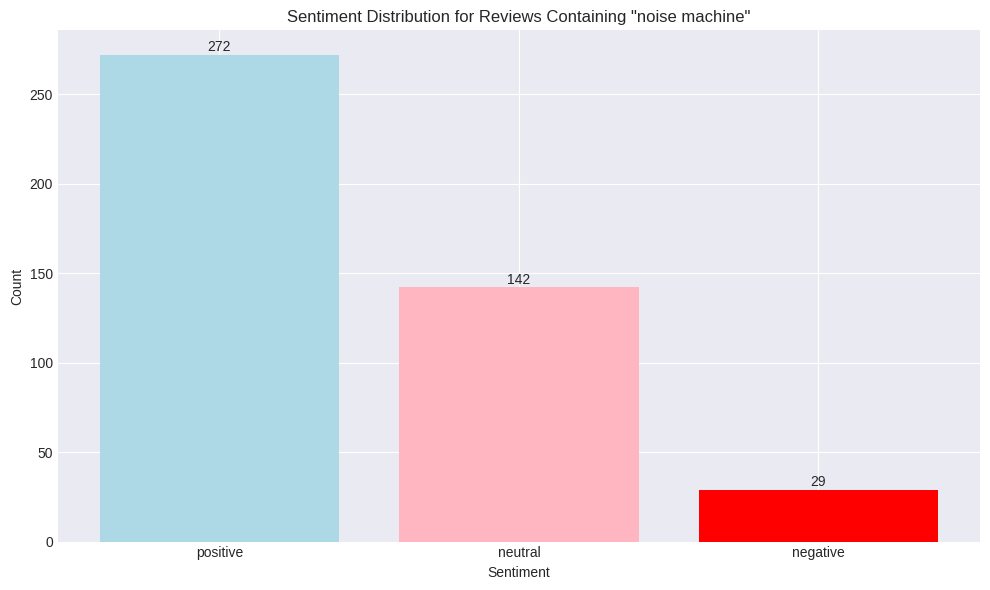

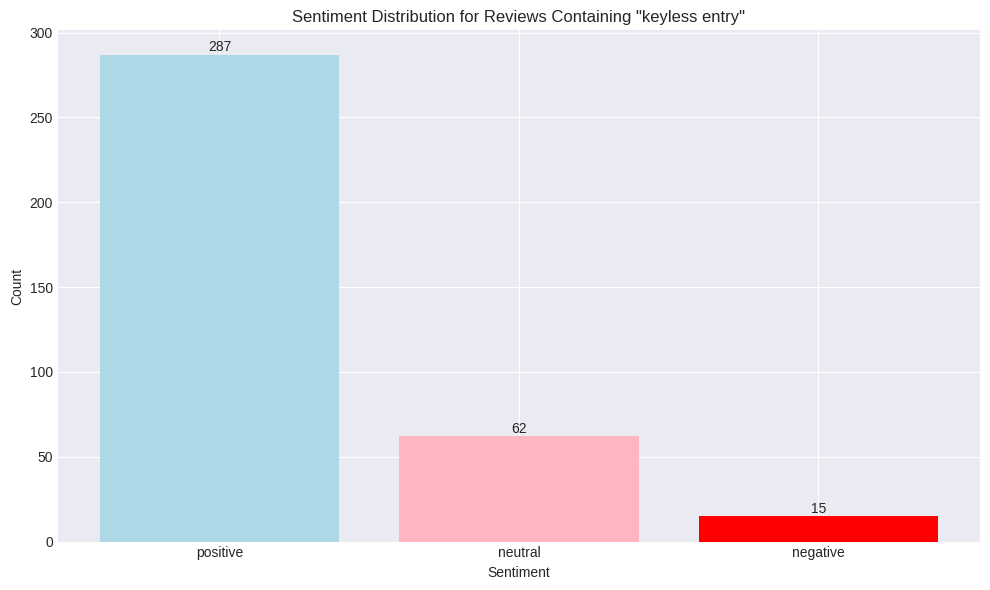

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the sentiment analysis results
df_sentiment = pd.read_csv('/content/reviews_with_sentiment_and_keyword_counts.csv')

# Visualize the distribution of sentiment (positive, negative, neutral)
sentiment_counts = df_sentiment['sentiment'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['lightblue', 'lightpink', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Reviews')
plt.tight_layout()

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(int(bar.get_height())), ha='center')

plt.show()

# Visualize sentiment scores for top 4 keywords
top_4_keywords = ['elevator', 'ramp', 'noise machine', 'keyless entry']  # Example top 4 keywords
for keyword in top_4_keywords:
    keyword_reviews = df_sentiment[df_sentiment['comments'].str.contains(keyword, case=False, na=False)]
    sentiment_counts = keyword_reviews['sentiment'].value_counts()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['lightblue', 'lightpink', 'red'])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title(f'Sentiment Distribution for Reviews Containing "{keyword}"')
    plt.tight_layout()

    # Add labels to each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, str(int(bar.get_height())), ha='center')

    plt.show()